In [2]:
import requests 
from bs4 import BeautifulSoup 
import re 
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
url="https://www.flipkart.com/search?q=refrigerator&as=on&as-show=on&otracker=AS_Query_OrganicAutoSuggest_3_2_na_na_ps&otracker1=AS_Query_OrganicAutoSuggest_3_2_na_na_ps&as-pos=3&as-type=RECENT&suggestionId=refrigerator&requestId=98da25ba-440d-45d1-a76e-1ac1445f7aaa&as-searchtext=refrigerator&page=1"
page=requests.get(url)

prices=[]
brands=[]
capacities=[]
cooling=[]
doortype=[]
rating=[]
warranties=[]
compressortype=[]

soup=BeautifulSoup(page.text)
soups=soup.find_all('div',class_="_2kHMtA")
for soup in soups:
    price=soup.find_all("div",class_="_30jeq3 _1_WHN1")
    
    for i in price:
        prices.append(i.text)
    
    
    
    data=soup.find_all("div",class_="_4rR01T")


    for i in data:
        brands.append(i.text.split(" ")[0])

    
    for i in data:
        a = i.text
        b = re.findall("(\d+)\sL",a)
        if len(b)>0:
            capacities.append(b[0])

    cool=soup.find_all("div",class_="_4rR01T")  
    
    for i in cool:
        a = i.text
        b = re.findall("(\w+)\sCool",a)
        c = re.findall("(\w+)\sFree",a)
        if len(b)>0:
            cooling.append(b[0])
        else:
             cooling.append(c[0])

    door=soup.find_all("div",class_="_4rR01T")           
    
    for i in door:
        a = i.text
        b = re.findall("(\w+)\sDoor",a)

        if len(b)>0:
            doortype.append(b[0])
        elif(a is "side by side"):
            doortype.append(b[0])

              
    rate=soup.find_all("div",class_="_4rR01T")            
    
    for i in rate:
        a = i.text
        b = re.findall("(\w+)\sStar",a)
        if len(b)>0:
            rating.append(b[0])
        else:
            rating.append(np.nan)


    warranty=soup.find_all("li",class_="rgWa7D")       
    
    for i in warranty:
         warranties.append(i.text.split(" ")[0])
    warranty_period=[]
    for i in warranties:
        try:
            a = int(i)
            warranty_period.append(a)
        except ValueError:
            pass



    
    ls=soup.find_all('ul',class_="_1xgFaf")
    for i in ls:
        a=i.find('li',class_='rgWa7D').text
        if len(a)>0:
            compressortype.append(a)
        else:
            compressortype.append(np.nan)
    
print(len(prices))
print(len(brands))
print(len(capacities))
print(len(cooling))
print(len(doortype))
print(len(rating))
print(len(warranty_period))
print(len(compressortype))

<>:56: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:56: SyntaxWarning: "is" with a literal. Did you mean "=="?


24
24
24
24
24
24
24
24


C:\Users\91834\AppData\Local\Temp\ipykernel_1668\919087869.py:56: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif(a is "side by side"):


In [3]:
d ={ "PRICE":prices,
     "BRANDS":brands,
     "CAPACITY":capacities,
     "COOLING":cooling,
     "DOORTYPE":doortype,
     "RATING":rating,
     "WARRANTY":warranty_period,
     "COMPRESSOR":compressortype
    }

df = pd.DataFrame(d)

In [4]:
df

,PRICE,BRANDS,CAPACITY,COOLING,DOORTYPE,RATING,WARRANTY,COMPRESSOR
0,"₹17,590",LG,185,Direct,Single,5,1,Smart Inverter Compressor
1,"₹25,490",LG,242,Frost,Double,3,1,Smart Inverter Compressor
2,"₹25,990",SAMSUNG,236,Frost,Double,3,1,Digital Inverter Compressor
3,"₹17,890",SAMSUNG,189,Direct,Single,5,1,Digital Inverter Compressor
4,"₹13,789",SAMSUNG,183,Direct,Single,2,1,Digital Inverter Compressor
5,"₹22,990",SAMSUNG,236,Frost,Double,2,1,Digital Inverter Compressor
6,"₹18,990",CANDY,240,Frost,Double,2,1,Inverter Compressor
7,"₹13,490",LG,185,Direct,Single,2,1,Reciprocating Compressor
8,"₹16,690",SAMSUNG,183,Direct,Single,4,1,Digital Inverter Compressor
9,"₹25,790",Whirlpool,240,Frost,Triple,NaN,1,Normal Compressor


In [44]:
prices = []
brands = []
capacities = []
cooling=[]
doortype=[]
rating=[]
warranty_period=[]
compressortype=[]


for i in range(2,25):
    url = "https://www.flipkart.com/search?q=refrigerator&as=on&as-show=on&otracker=AS_Query_OrganicAutoSuggest_3_2_na_na_ps&otracker1=AS_Query_OrganicAutoSuggest_3_2_na_na_ps&as-pos=3&as-type=RECENT&suggestionId=refrigerator&requestId=98da25ba-440d-45d1-a76e-1ac1445f7aaa&as-searchtext=refrigerator&page="+str(i)
#     print(url)
    page = requests.get(url)
    
    soup=BeautifulSoup(page.text)
    soups=soup.find_all('div',class_="_2kHMtA")
    for soup in soups:
        price=soup.find_all("div",class_="_30jeq3 _1_WHN1")

        for i in price:
            prices.append(i.text)
    
        data=soup.find_all("div",class_="_4rR01T")


        for i in data:
            brands.append(i.text.split(" ")[0])

        for i in data:
            a = i.text
            b = re.findall("(\d+)\sL",a)
            if len(b)>0:
                capacities.append(b[0])
            else:
                capacities.append(np.nan)  

        cool=soup.find_all("div",class_="_4rR01T")  

        for i in cool:
            a = i.text
            b = re.findall("(\w+)\sCool",a)
            c = re.findall("(\w+)\sFree",a)
            if len(b)>0:
                cooling.append(b[0])
            else:
                 cooling.append(c[0])

        door=soup.find_all("div",class_="_4rR01T")           

        for i in door:
            a = i.text
            b = re.findall("(\w+)\sDoor",a)

            if len(b)>0:
                doortype.append(b[0])

            elif(a is "side by side"):
                doortype.append(b[0])
            else:
                doortype.append(np.nan)


        rate=soup.find_all("div",class_="_4rR01T")            

        for i in rate:
            a = i.text
            b = re.findall("(\w+)\sStar",a)
            if len(b)>0:
                rating.append(b[0])
            else:
                rating.append(np.nan)    

        warranty=soup.find_all("li",class_="rgWa7D")       
        warranties=[]
        for i in warranty:
             warranties.append(i.text.split(" ")[0])
        for i in warranties:
            try:
                a = int(i)
                warranty_period.append(a)
            except ValueError:
                pass
         


        ls=soup.find_all('ul',class_="_1xgFaf")
        for i in ls:
            a=i.find('li',class_='rgWa7D').text
            if len(a)>0:
                compressortype.append(a)
            else:
                compressortype.append(np.nan)

print("price",len(prices))
print("brand",len(brands))
print("capacity",len(capacities))
print("cooling",len(cooling))
print("doortype",len(doortype))
print("rating",len(rating))
print("warranty_period",len(warranty_period))
print("compressortype",len(compressortype))

<>:59: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:59: SyntaxWarning: "is" with a literal. Did you mean "=="?
C:\Users\91834\AppData\Local\Temp\ipykernel_1668\2313854397.py:59: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif(a is "side by side"):


price 552
brand 552
capacity 552
cooling 552
doortype 552
rating 552
warranty_period 552
compressortype 552


In [45]:
d ={ "PRICE":prices,
     "BRANDS":brands,
     "CAPACITY":capacities,
     "COOLING":cooling,
     "DOORTYPE":doortype,
     "RATING":rating,
     "WARRANTY":warranty_period,
     "COMPRESSOR":compressortype
    }



In [46]:
df1 = pd.DataFrame(d)

In [47]:
df1

,PRICE,BRANDS,CAPACITY,COOLING,DOORTYPE,RATING,WARRANTY,COMPRESSOR
0,"₹13,990",SAMSUNG,183,Direct,Single,2,1,Digital Inverter Compressor
1,"₹17,590",LG,185,Direct,Single,5,1,Smart Inverter Compressor
2,"₹14,840",Godrej,180,Direct,Single,4,1,Fixed Speed Compressor
3,"₹13,490",Godrej,180,Direct,Single,3,1,Fixed Speed Compressor
4,"₹25,490",LG,242,Frost,Double,3,1,Smart Inverter Compressor
...,...,...,...,...,...,...,...,...
547,"₹49,990",Electrolux,360,Frost,Double,1,1,Inverter
548,"₹19,490",LG,201,Direct,Single,5,1,Smart Inverter Compressor
549,"₹19,990",LG,224,Direct,Single,4,1,Smart Inverter Compressor
550,"₹24,599",LG,261,Direct,Single,3,1,Inverter Compressor


# JOINING THE DATAFRAMES

In [107]:
final_df = pd.concat([df,df1],axis=0,ignore_index=True)

In [108]:
final_df.to_csv(r"C:\Users\91834\Desktop\web_scrapping\refrigeratorfinal.csv")


In [128]:
final_df=pd.read_csv(r"C:\Users\91834\Desktop\web_scrapping\refrigeratorfinal.csv")
final_df

,Unnamed: 0,PRICE,BRANDS,CAPACITY,COOLING,DOORTYPE,RATING,WARRANTY,COMPRESSOR
0,0,"₹17,590",LG,185.0,Direct,Single,5.0,1,Smart Inverter Compressor
1,1,"₹25,490",LG,242.0,Frost,Double,3.0,1,Smart Inverter Compressor
2,2,"₹25,990",SAMSUNG,236.0,Frost,Double,3.0,1,Digital Inverter Compressor
3,3,"₹17,890",SAMSUNG,189.0,Direct,Single,5.0,1,Digital Inverter Compressor
4,4,"₹13,789",SAMSUNG,183.0,Direct,Single,2.0,1,Digital Inverter Compressor
...,...,...,...,...,...,...,...,...,...
571,571,"₹49,990",Electrolux,360.0,Frost,Double,1.0,1,Inverter
572,572,"₹19,490",LG,201.0,Direct,Single,5.0,1,Smart Inverter Compressor
573,573,"₹19,990",LG,224.0,Direct,Single,4.0,1,Smart Inverter Compressor
574,574,"₹24,599",LG,261.0,Direct,Single,3.0,1,Inverter Compressor


# DATA CLEANING 

In [129]:
final_df.head()

,Unnamed: 0,PRICE,BRANDS,CAPACITY,COOLING,DOORTYPE,RATING,WARRANTY,COMPRESSOR
0,0,"₹17,590",LG,185.0,Direct,Single,5.0,1,Smart Inverter Compressor
1,1,"₹25,490",LG,242.0,Frost,Double,3.0,1,Smart Inverter Compressor
2,2,"₹25,990",SAMSUNG,236.0,Frost,Double,3.0,1,Digital Inverter Compressor
3,3,"₹17,890",SAMSUNG,189.0,Direct,Single,5.0,1,Digital Inverter Compressor
4,4,"₹13,789",SAMSUNG,183.0,Direct,Single,2.0,1,Digital Inverter Compressor


In [130]:
final_df.tail()

,Unnamed: 0,PRICE,BRANDS,CAPACITY,COOLING,DOORTYPE,RATING,WARRANTY,COMPRESSOR
571,571,"₹49,990",Electrolux,360.0,Frost,Double,1.0,1,Inverter
572,572,"₹19,490",LG,201.0,Direct,Single,5.0,1,Smart Inverter Compressor
573,573,"₹19,990",LG,224.0,Direct,Single,4.0,1,Smart Inverter Compressor
574,574,"₹24,599",LG,261.0,Direct,Single,3.0,1,Inverter Compressor
575,575,"₹60,990",realme,631.0,Frost,NaN,NaN,1,Advanced Inverter Compressor


In [131]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  576 non-null    int64  
 1   PRICE       576 non-null    object 
 2   BRANDS      576 non-null    object 
 3   CAPACITY    575 non-null    float64
 4   COOLING     576 non-null    object 
 5   DOORTYPE    546 non-null    object 
 6   RATING      531 non-null    float64
 7   WARRANTY    576 non-null    int64  
 8   COMPRESSOR  576 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 40.6+ KB


In [ ]:
final_df.isnull().sum()

In [133]:
final_df=final_df.fillna(method='bfill',inplace=True)
# dataframe

In [134]:
final_df.isnull().sum()

Unnamed: 0    0
PRICE         0
BRANDS        0
CAPACITY      0
COOLING       0
DOORTYPE      1
RATING        1
WARRANTY      0
COMPRESSOR    0
dtype: int64

In [135]:
final_df = final_df.dropna(axis=0)

In [136]:
final_df.isnull().sum()

Unnamed: 0    0
PRICE         0
BRANDS        0
CAPACITY      0
COOLING       0
DOORTYPE      0
RATING        0
WARRANTY      0
COMPRESSOR    0
dtype: int64

In [3]:
final_df=pd.read_csv(r"C:\Users\91834\Desktop\web_scrapping\refrigeratorfinal.csv")
final_df

,Unnamed: 0,PRICE,BRANDS,CAPACITY,COOLING,DOORTYPE,RATING,WARRANTY,COMPRESSOR
0,0,17590,LG,185,Direct,Single,5,1,Smart Inverter Compressor
1,1,25490,LG,242,Frost,Double,3,1,Smart Inverter Compressor
2,2,25990,SAMSUNG,236,Frost,Double,3,1,Digital Inverter Compressor
3,3,17890,SAMSUNG,189,Direct,Single,5,1,Digital Inverter Compressor
4,4,13789,SAMSUNG,183,Direct,Single,2,1,Digital Inverter Compressor
...,...,...,...,...,...,...,...,...,...
570,570,28990,LG,288,Frost,Double,2,1,Smart Inverter Compressor
571,571,49990,Electrolux,360,Frost,Double,1,1,Inverter
572,572,19490,LG,201,Direct,Single,5,1,Smart Inverter Compressor
573,573,19990,LG,224,Direct,Single,4,1,Smart Inverter Compressor


In [5]:
final_df.duplicated().sum()

0

In [137]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 575 entries, 0 to 574
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  575 non-null    int64  
 1   PRICE       575 non-null    object 
 2   BRANDS      575 non-null    object 
 3   CAPACITY    575 non-null    float64
 4   COOLING     575 non-null    object 
 5   DOORTYPE    575 non-null    object 
 6   RATING      575 non-null    float64
 7   WARRANTY    575 non-null    int64  
 8   COMPRESSOR  575 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 44.9+ KB


In [138]:
final_df['PRICE'] = [i.replace("₹","").replace(",","") for i in final_df['PRICE']]

In [139]:
final_df['PRICE'] = final_df['PRICE'].astype("int")


In [140]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 575 entries, 0 to 574
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  575 non-null    int64  
 1   PRICE       575 non-null    int32  
 2   BRANDS      575 non-null    object 
 3   CAPACITY    575 non-null    float64
 4   COOLING     575 non-null    object 
 5   DOORTYPE    575 non-null    object 
 6   RATING      575 non-null    float64
 7   WARRANTY    575 non-null    int64  
 8   COMPRESSOR  575 non-null    object 
dtypes: float64(2), int32(1), int64(2), object(4)
memory usage: 42.7+ KB


In [21]:
final_dataframe=pd.read_csv(r"C:\Users\91834\Desktop\web_scrapping\refrigeratorfinal.csv")
final_dataframe

,Unnamed: 0,PRICE,BRANDS,CAPACITY,COOLING,DOORTYPE,RATING,WARRANTY,COMPRESSOR
0,0,17590,LG,185,Direct,Single,5,1,Smart Inverter Compressor
1,1,25490,LG,242,Frost,Double,3,1,Smart Inverter Compressor
2,2,25990,SAMSUNG,236,Frost,Double,3,1,Digital Inverter Compressor
3,3,17890,SAMSUNG,189,Direct,Single,5,1,Digital Inverter Compressor
4,4,13789,SAMSUNG,183,Direct,Single,2,1,Digital Inverter Compressor
...,...,...,...,...,...,...,...,...,...
570,570,28990,LG,288,Frost,Double,2,1,Smart Inverter Compressor
571,571,49990,Electrolux,360,Frost,Double,1,1,Inverter
572,572,19490,LG,201,Direct,Single,5,1,Smart Inverter Compressor
573,573,19990,LG,224,Direct,Single,4,1,Smart Inverter Compressor


In [35]:
del final_dataframe['Unnamed: 0'] 

In [36]:
final_dataframe

,PRICE,BRANDS,CAPACITY,COOLING,DOORTYPE,RATING,WARRANTY,COMPRESSOR
0,17590,LG,185,Direct,Single,5,1,Smart Inverter Compressor
1,25490,LG,242,Frost,Double,3,1,Smart Inverter Compressor
2,25990,SAMSUNG,236,Frost,Double,3,1,Digital Inverter Compressor
3,17890,SAMSUNG,189,Direct,Single,5,1,Digital Inverter Compressor
4,13789,SAMSUNG,183,Direct,Single,2,1,Digital Inverter Compressor
...,...,...,...,...,...,...,...,...
570,28990,LG,288,Frost,Double,2,1,Smart Inverter Compressor
571,49990,Electrolux,360,Frost,Double,1,1,Inverter
572,19490,LG,201,Direct,Single,5,1,Smart Inverter Compressor
573,19990,LG,224,Direct,Single,4,1,Smart Inverter Compressor


In [37]:
final_dataframe.columns

Index(['PRICE', 'BRANDS', 'CAPACITY', 'COOLING', 'DOORTYPE', 'RATING',
       'WARRANTY', 'COMPRESSOR'],
      dtype='object')

# ANALYSIS

In [39]:
#counting all the brands 
final_dataframe['BRANDS'].value_counts()

LG            196
Godrej        119
SAMSUNG        81
Whirlpool      63
Haier          31
Electrolux     16
Voltas         13
CANDY           9
Panasonic       9
Lloyd           7
Midea           6
realme          6
BOSCH           5
Liebherr        4
Kelvinator      4
MarQ            2
Lifelong        2
Hisense         1
ONIDA           1
Name: BRANDS, dtype: int64

In [87]:
#count the occurences of ratings 
final_dataframe['RATING'].value_counts()

3    193
4    127
5    120
2    108
1     27
Name: RATING, dtype: int64

In [40]:
#all the brands 
final_dataframe['BRANDS'].unique()

array(['LG', 'SAMSUNG', 'CANDY', 'Whirlpool', 'Electrolux', 'Haier',
       'Godrej', 'realme', 'MarQ', 'Lloyd', 'Midea', 'Voltas',
       'Panasonic', 'Lifelong', 'Liebherr', 'Hisense', 'ONIDA', 'BOSCH',
       'Kelvinator'], dtype=object)

In [69]:
#minimum aggregate of each brand 
final_dataframe.groupby("BRANDS")["PRICE"].agg(["min"])

,min
BRANDS,
BOSCH,31990
CANDY,13490
Electrolux,49990
Godrej,11490
Haier,10990
Hisense,45990
Kelvinator,8999
LG,13490
Liebherr,19990


In [224]:
final_dataframe.groupby(["BRANDS"])["RATING"].mean()

BRANDS
BOSCH         3.000000
CANDY         3.555556
Electrolux    1.000000
Godrej        3.630252
Haier         3.451613
Hisense       4.000000
Kelvinator    1.750000
LG            3.596939
Liebherr      3.500000
Lifelong      3.500000
Lloyd         3.714286
MarQ          3.000000
Midea         3.166667
ONIDA         2.000000
Panasonic     3.000000
SAMSUNG       3.197531
Voltas        2.461538
Whirlpool     3.238095
realme        2.666667
Name: RATING, dtype: float64

In [41]:
# GROUP BY 
#COMPARE AVG PRICE BY RATING
final_dataframe.groupby('RATING')['PRICE'].mean()

RATING
1    49897.407407
2    27050.925926
3    27662.160622
4    23893.102362
5    20618.075000
Name: PRICE, dtype: float64

In [64]:
# GROUP BY 
#COMPARE PRICE BY BRAND AND CAPACITY
final_dataframe.groupby(['BRANDS','CAPACITY'])['PRICE'].mean()

BRANDS     CAPACITY
BOSCH      263         32322.5
           290         31990.0
           332         42899.0
           347         36990.0
CANDY      190         14290.0
                        ...   
Whirlpool  500         59840.0
realme     180         12490.0
           205         13990.0
           236         21990.0
           564         45990.0
Name: PRICE, Length: 157, dtype: float64

In [72]:
# GROUP BY 
#COMPARE AVERAGE PRICE BY BRANDS,CAPACITY,RATING,DOORTYPE
final_dataframe.groupby(['BRANDS','CAPACITY','RATING','DOORTYPE'])['PRICE'].mean()

BRANDS     CAPACITY  RATING  DOORTYPE
BOSCH      263       3       Double      32490.0
                     4       Double      32155.0
           290       3       Double      31990.0
           332       2       Triple      42899.0
           347       3       Double      36990.0
                                          ...   
Whirlpool  500       3       Double      59840.0
realme     180       3       Single      12490.0
           205       3       Single      13990.0
           236       2       Double      21990.0
           564       2       Double      45990.0
Name: PRICE, Length: 208, dtype: float64

In [73]:
# GROUP BY 
#COMPARE AVERAGE PRICE BY BRAND,COOLING,COMPRESSOR
final_dataframe.groupby(['BRANDS','COOLING','COMPRESSOR'])['PRICE'].mean()

BRANDS     COOLING  COMPRESSOR                  
BOSCH      Frost    Vario Inverter Compressor       34490.000
                    VarioInverter                   35848.000
CANDY      Direct   Inverter Compressor             14490.000
                    Reciprocatory Compressor        14240.000
           Frost    Inverter Compressor             23490.000
                                                      ...    
Whirlpool  Frost    Normal Compressor               28447.375
realme     Direct   Inverter Compressor             13990.000
                    Reciprocating Compressor        12490.000
           Frost    Advanced Inverter Compressor    45990.000
                    Inverter Compressor             21990.000
Name: PRICE, Length: 73, dtype: float64

In [77]:
# GROUP BY 
#COMPARE MAXIMUM PRICE BY BRAND,COOLING,COMPRESSOR
final_dataframe.groupby(['BRANDS','COOLING','COMPRESSOR'])['PRICE'].max()

BRANDS     COOLING  COMPRESSOR                  
BOSCH      Frost    Vario Inverter Compressor       36990
                    VarioInverter                   42899
CANDY      Direct   Inverter Compressor             14490
                    Reciprocatory Compressor        14990
           Frost    Inverter Compressor             27990
                                                    ...  
Whirlpool  Frost    Normal Compressor               35290
realme     Direct   Inverter Compressor             13990
                    Reciprocating Compressor        12490
           Frost    Advanced Inverter Compressor    45990
                    Inverter Compressor             21990
Name: PRICE, Length: 73, dtype: int64

In [80]:
# GROUP BY 
#COMPARE MAXIMUM PRICE BY BRAND,COOLING,COMPRESSOR
final_dataframe.groupby(['WARRANTY','RATING','CAPACITY'])['PRICE'].max()

WARRANTY  RATING  CAPACITY
1         1       95          10380
                  165         10990
                  180         11490
                  183         13200
                  240         24990
                              ...  
2         2       340         33490
          3       185         14980
                  225         16490
          4       200         15290
                  224         19490
Name: PRICE, Length: 172, dtype: int64

In [86]:
final_dataframe.groupby(['WARRANTY','BRANDS'])['PRICE'].count()

WARRANTY  BRANDS    
1         BOSCH           5
          CANDY           9
          Electrolux     16
          Godrej        119
          Haier          31
          Hisense         1
          Kelvinator      4
          LG            195
          Liebherr        4
          Lifelong        2
          Lloyd           7
          MarQ            2
          Midea           6
          ONIDA           1
          Panasonic       9
          SAMSUNG        81
          Voltas          4
          Whirlpool      63
          realme          6
2         LG              1
          Voltas          9
Name: PRICE, dtype: int64

In [167]:
## budget is around 50000 and 350000
final_dataframe[(final_dataframe['PRICE']>50000) & (final_dataframe['PRICE']<350000) &(final_dataframe['BRANDS']=="SAMSUNG")]

,PRICE,BRANDS,CAPACITY,COOLING,DOORTYPE,RATING,WARRANTY,COMPRESSOR
142,86990,SAMSUNG,653,Frost,Double,3,1,Digital Inverter Compressor
148,81990,SAMSUNG,700,Frost,Double,2,1,Digital Inverter Compressor
294,87990,SAMSUNG,653,Frost,Single,3,1,Digital Inverter Compressor
415,89990,SAMSUNG,692,Frost,Single,2,1,Digital Inverter Compressor
445,89990,SAMSUNG,692,Frost,Single,3,1,Digital Inverter Compressor
458,60990,SAMSUNG,322,Frost,Double,3,1,Digital Inverter Compressor
499,299990,SAMSUNG,702,Direct,French,4,1,Digital Inverter Compressor
502,64500,SAMSUNG,523,Frost,Double,2,1,Digital Inverter Compressor
508,299990,SAMSUNG,865,Frost,French,1,1,Digital Inverter Compressor
554,299990,SAMSUNG,702,Direct,French,3,1,Digital Inverter Compressor


In [40]:
## budget is around 0 and 9000
final_dataframe[(final_dataframe['PRICE']>0) & (final_dataframe['PRICE']<9000)]

,PRICE,BRANDS,CAPACITY,COOLING,DOORTYPE,RATING,WARRANTY,COMPRESSOR
405,8999,Kelvinator,45,Direct,Single,2,1,Normal


In [57]:
## budget is around 299989 and 300000
final_dataframe[(final_dataframe['PRICE']>299989) & (final_dataframe['PRICE']<300000)]

,PRICE,BRANDS,CAPACITY,COOLING,DOORTYPE,RATING,WARRANTY,COMPRESSOR
499,299990,SAMSUNG,702,Direct,French,4,1,Digital Inverter Compressor
508,299990,SAMSUNG,865,Frost,French,1,1,Digital Inverter Compressor
554,299990,SAMSUNG,702,Direct,French,3,1,Digital Inverter Compressor


# VISUALIZATION
 

# UNIVARIATE ANALYSIS

In [3]:
final_dataframe=pd.read_csv(r"C:\Users\91834\Desktop\web_scrapping\refrigeratorfinal.csv")


In [5]:
del final_dataframe['Unnamed: 0'] 

In [6]:
final_dataframe

,PRICE,BRANDS,CAPACITY,COOLING,DOORTYPE,RATING,WARRANTY,COMPRESSOR
0,17590,LG,185,Direct,Single,5,1,Smart Inverter Compressor
1,25490,LG,242,Frost,Double,3,1,Smart Inverter Compressor
2,25990,SAMSUNG,236,Frost,Double,3,1,Digital Inverter Compressor
3,17890,SAMSUNG,189,Direct,Single,5,1,Digital Inverter Compressor
4,13789,SAMSUNG,183,Direct,Single,2,1,Digital Inverter Compressor
...,...,...,...,...,...,...,...,...
570,28990,LG,288,Frost,Double,2,1,Smart Inverter Compressor
571,49990,Electrolux,360,Frost,Double,1,1,Inverter
572,19490,LG,201,Direct,Single,5,1,Smart Inverter Compressor
573,19990,LG,224,Direct,Single,4,1,Smart Inverter Compressor


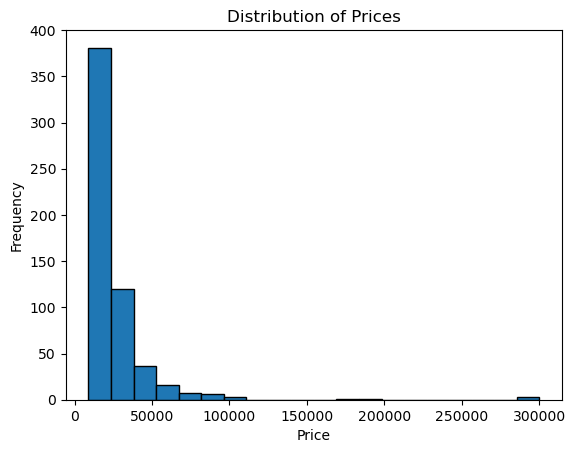

In [118]:
plt.hist(final_dataframe['PRICE'], bins=20, edgecolor='black')
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

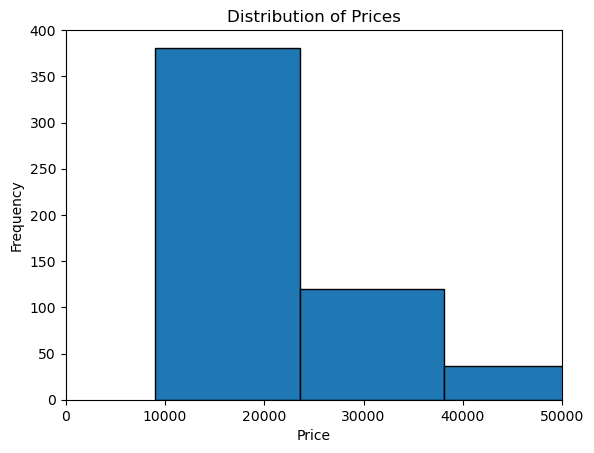

In [206]:
plt.hist(final_dataframe['PRICE'], bins=20, edgecolor='black')
plt.title('Distribution of Prices')
plt.xlim(0,50000)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

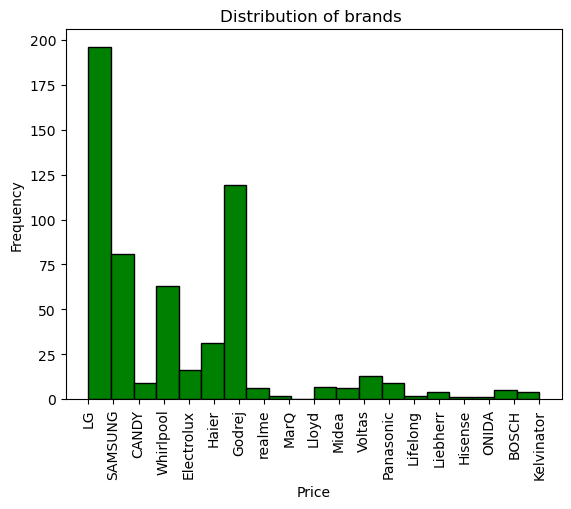

In [119]:
plt.hist(final_dataframe['BRANDS'], bins=20, edgecolor='black',color='green')
plt.title('Distribution of brands ')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.xticks(rotation="vertical")
plt.show()

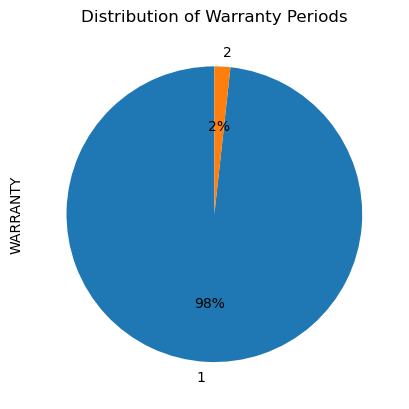

In [246]:
final_dataframe["WARRANTY"].value_counts().plot(kind="pie",autopct="%0.0F%%",startangle=90)
plt.title("Distribution of Warranty Periods")
plt.show()

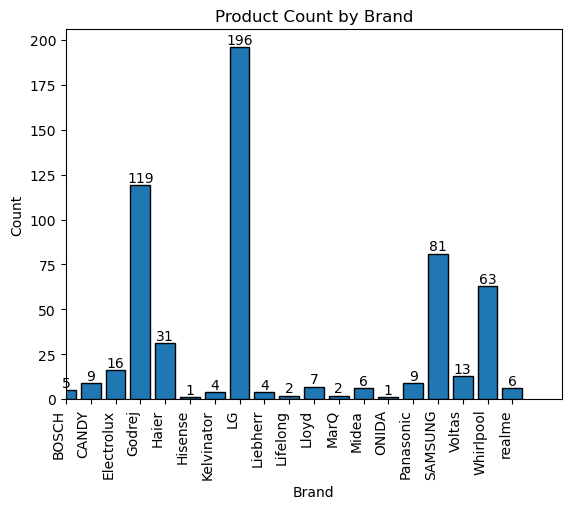

In [187]:
brand_counts = final_dataframe.groupby('BRANDS').size()
plt.bar(brand_counts.index, brand_counts.values, edgecolor='black')
for i, value in enumerate(brand_counts.values):
    plt.text(i, value, str(value), ha='center', va='bottom')
    
plt.title('Product Count by Brand')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xlim(0,20)
plt.xticks(rotation='vertical', ha='right')

plt.show()


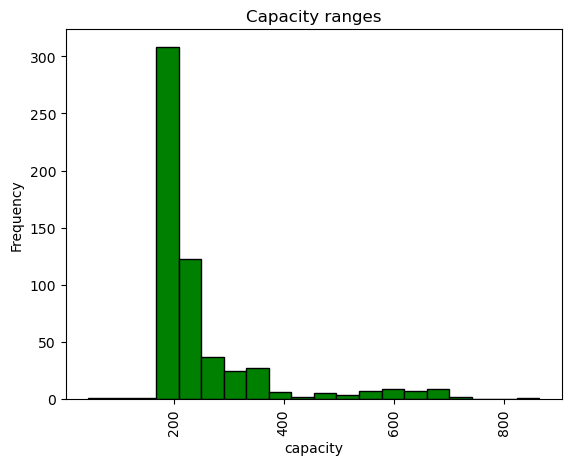

In [248]:
plt.hist(final_dataframe['CAPACITY'], bins=20, edgecolor='black',color='green')
plt.title('Capacity ranges')
plt.xlabel('capacity')
plt.ylabel('Frequency')
plt.xticks(rotation="vertical")
plt.show()

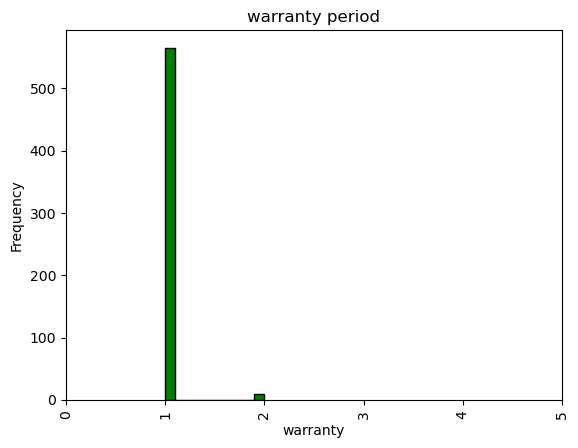

In [193]:
plt.hist(final_dataframe['WARRANTY'], edgecolor='black',color='green')
plt.title('warranty period')
plt.xlabel('warranty')
plt.ylabel('Frequency')
plt.xlim(0,5)
plt.xticks(rotation="vertical")
plt.show()

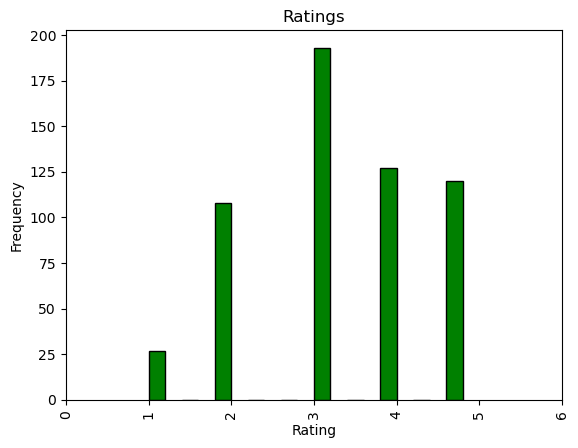

In [137]:
plt.hist(final_dataframe['RATING'], edgecolor='black',color='green',width=0.2)
plt.title('Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.xlim(0,6)
plt.xticks(rotation="vertical")
plt.show()

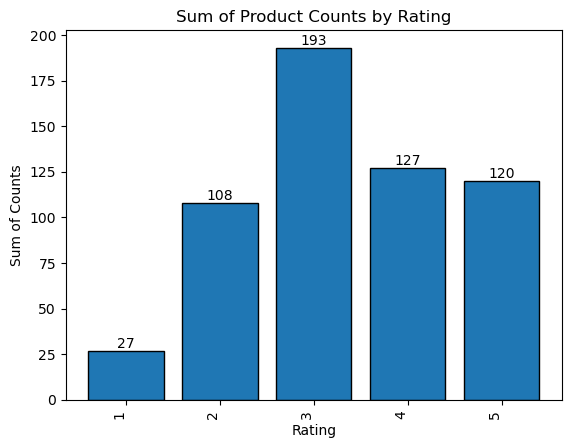

In [113]:
rating_counts = final_dataframe.groupby('RATING').size()

plt.bar(rating_counts.index, rating_counts.values, edgecolor='black')

for i, value in enumerate(rating_counts.values):
    plt.text(i+1.0, value, str(value), ha='center', va='bottom')

plt.title('Sum of Product Counts by Rating')
plt.xlabel('Rating')
plt.ylabel('Sum of Counts')

plt.xticks(rotation=90, ha='right')

plt.show()

C:\Users\91834\AppData\Local\Temp\ipykernel_4420\2433973412.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final_dataframe['PRICE'])


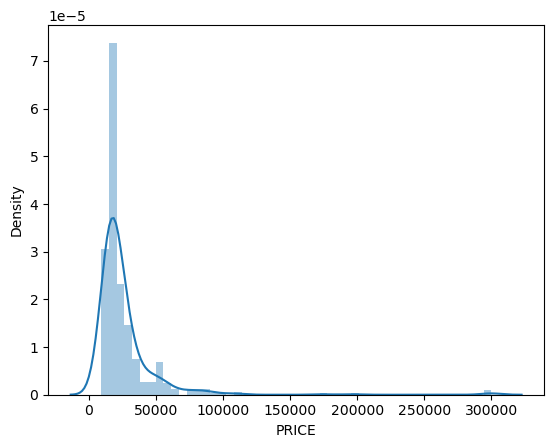

In [204]:
sns.distplot(final_dataframe['PRICE'])
# plt.xticks(rotation="90")
plt.show()

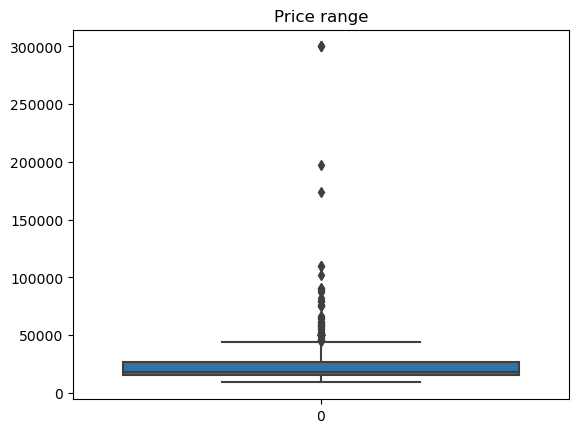

In [8]:
sns.boxplot(final_dataframe['PRICE'])
plt.title("Price range")
plt.show()

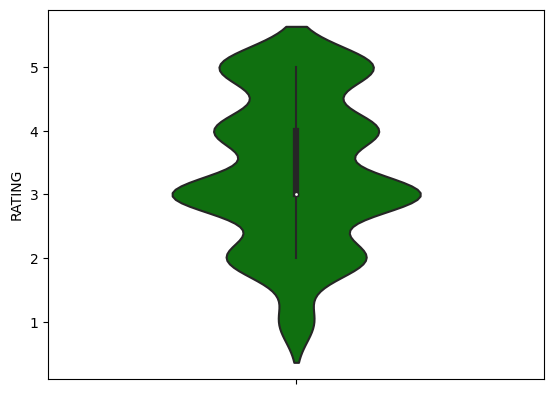

In [127]:
sns.violinplot(y = "RATING", data = final_dataframe, width=0.5, color="GREEN")
plt.show()

# BIVARIATE 

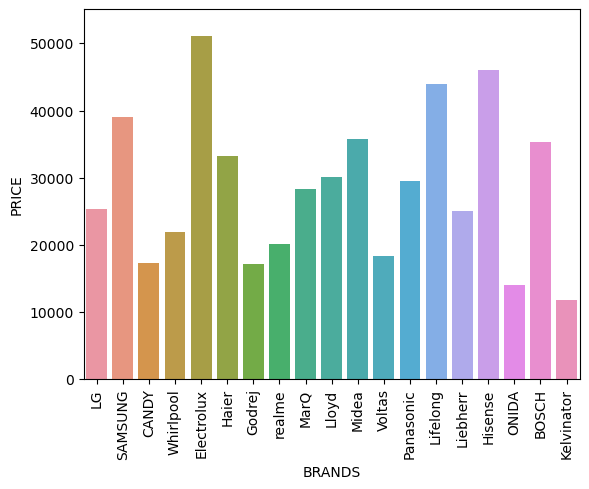

In [42]:
sns.barplot(x = final_dataframe["BRANDS"], y =final_dataframe["PRICE"],errwidth=0)
plt.xticks(rotation="vertical")
plt.show()

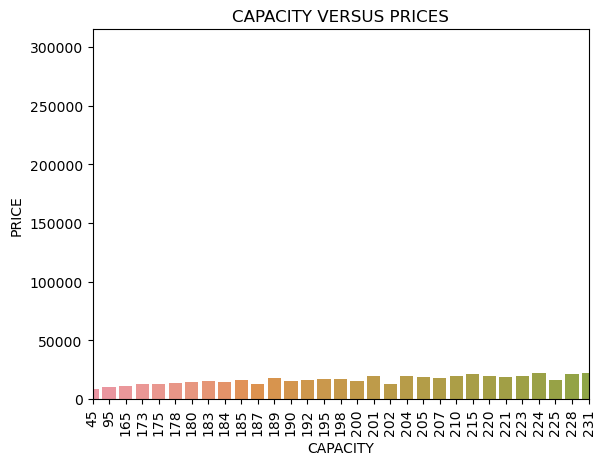

In [29]:
sns.barplot(x = final_dataframe["CAPACITY"], y =final_dataframe["PRICE"],errwidth=0)
plt.xticks(rotation="vertical")
plt.xlim(0,30)
plt.title("CAPACITY VERSUS PRICES")
plt.show()

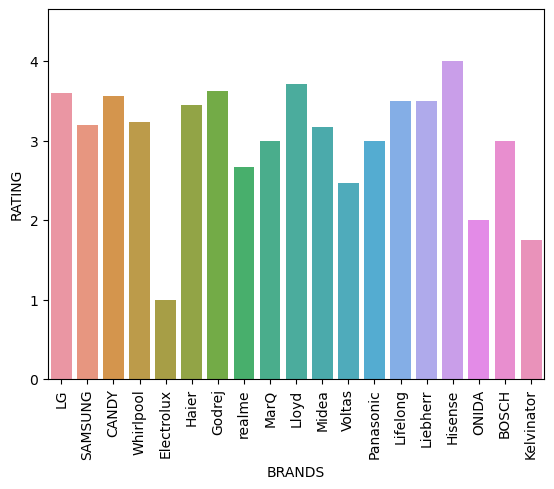

In [222]:
sns.barplot(x = final_dataframe["BRANDS"], y =final_dataframe["RATING"],errwidth=0)
plt.xticks(rotation="vertical")
plt.show()

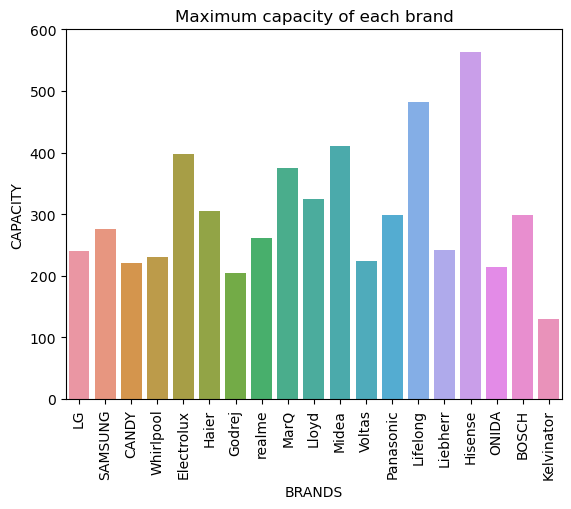

In [207]:
sns.barplot(x = final_dataframe["BRANDS"], y =final_dataframe["CAPACITY"],errwidth=0)
plt.ylim(0,600)
plt.title("Maximum capacity of each brand")
plt.xticks(rotation="vertical")
plt.show()

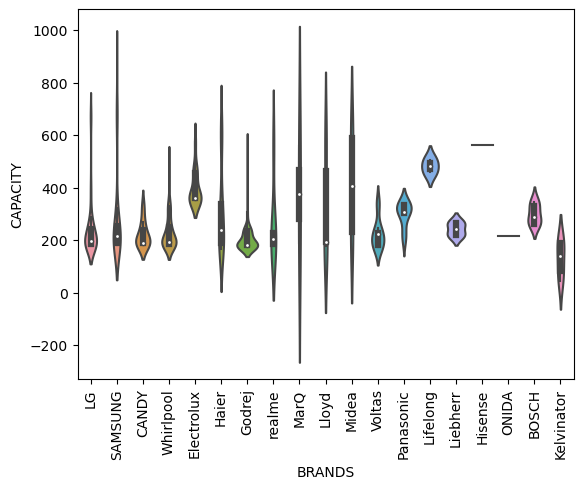

In [56]:
sns.violinplot(x = final_dataframe["BRANDS"], y =final_dataframe["CAPACITY"])
plt.xticks(rotation="vertical")
plt.show()

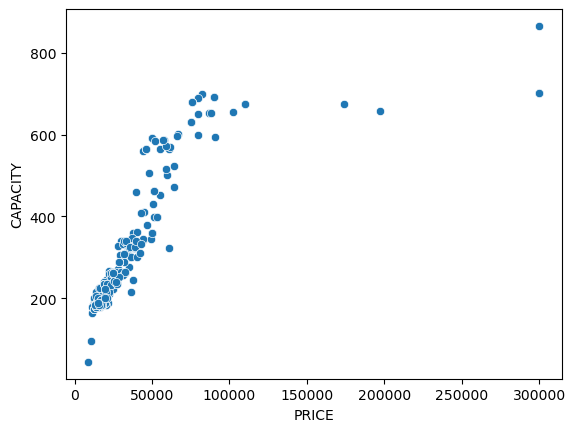

In [57]:
sns.scatterplot(x = final_dataframe["PRICE"], y =final_dataframe["CAPACITY"])
# plt.xticks(rotation="vertical")
plt.show()

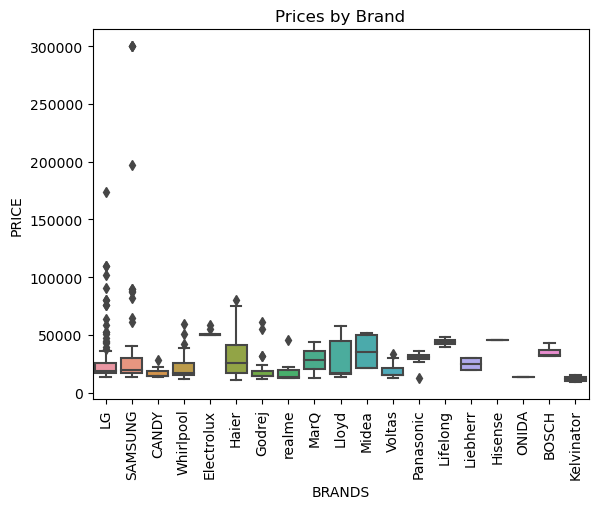

In [58]:
sns.boxplot(x = final_dataframe["BRANDS"], y =final_dataframe["PRICE"])
plt.xticks(rotation="vertical")
plt.title('Prices by Brand')
plt.show()

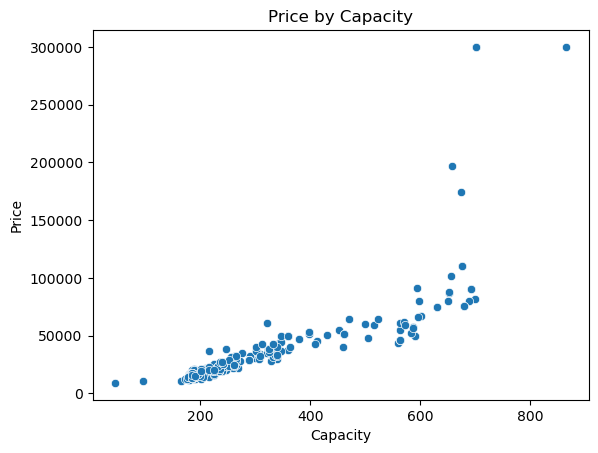

In [59]:
sns.scatterplot(x='CAPACITY', y='PRICE', data=final_dataframe)
plt.title('Price by Capacity')
plt.xlabel('Capacity')
plt.ylabel('Price')
plt.show()

# MULTIVARAITE 

C:\Users\91834\AppData\Local\Temp\ipykernel_25652\2595556857.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(final_dataframe.corr(),annot=True,cmap='gnuplot',linewidth=1,linecolor='black')


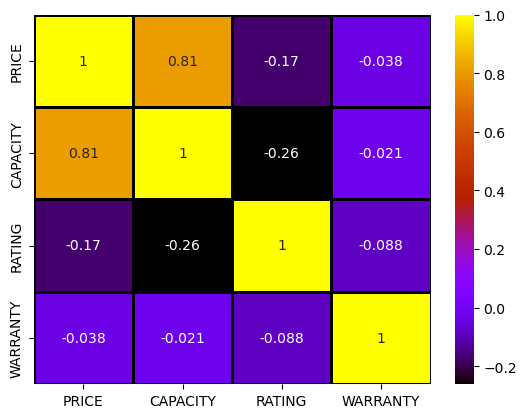

In [19]:
sns.heatmap(final_dataframe.corr(),annot=True,cmap='gnuplot',linewidth=1,linecolor='black')
plt.show()

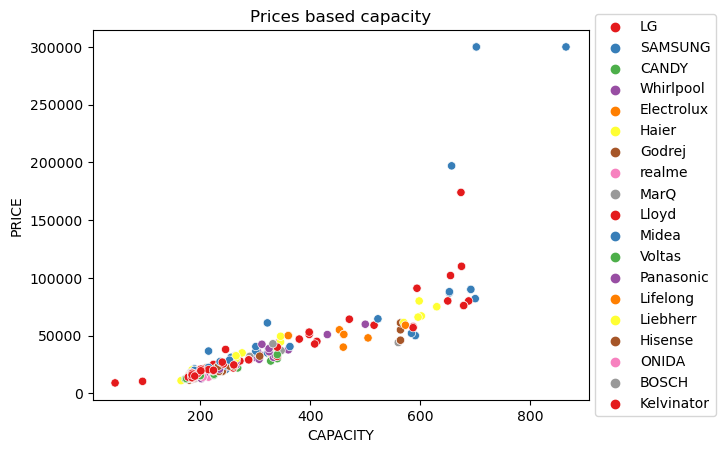

In [61]:
sns.scatterplot(x = "CAPACITY", y = "PRICE", data = final_dataframe,hue = "BRANDS",palette='Set1')
plt.title("Prices based capacity")
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.show()

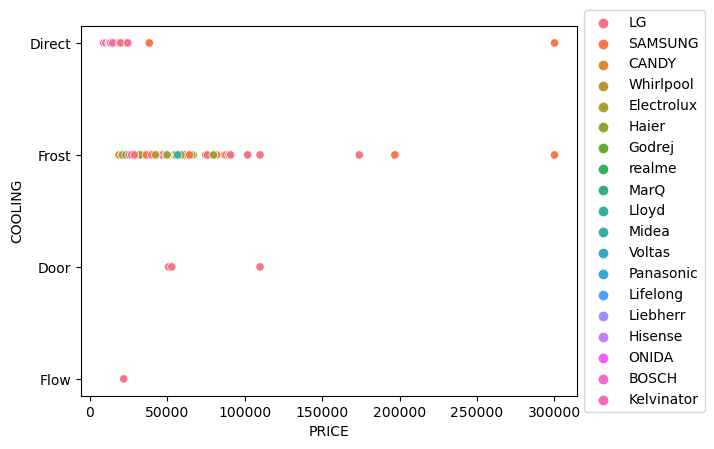

In [166]:
sns.scatterplot(x='PRICE',y='COOLING',data=final_dataframe,hue='BRANDS')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.show()

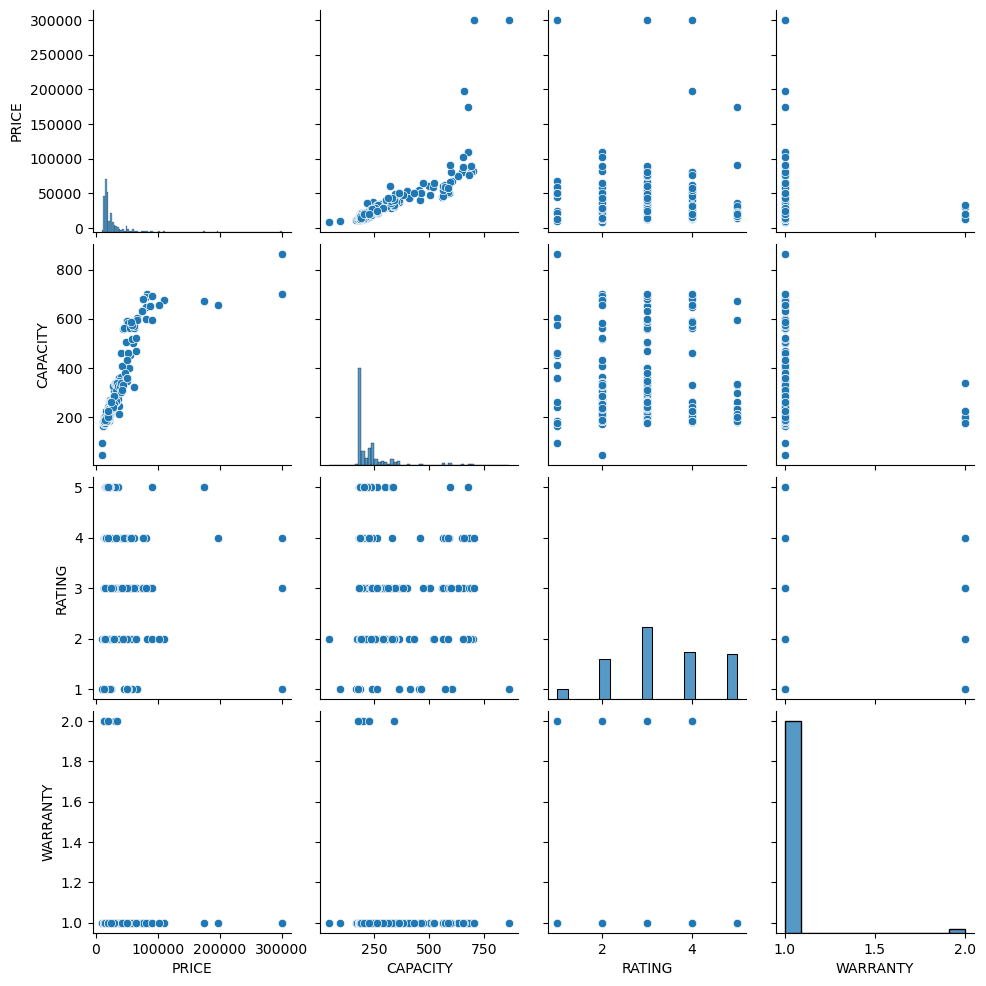

In [63]:
sns.pairplot(data=final_dataframe)
plt.show()